<a href="https://colab.research.google.com/github/ShrutiThakur3/VCET-DS/blob/main/DataSet_Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df=pd.read_csv("data.csv")
print(df)

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                         

In [3]:
print(df.isnull())
print(df.isnull().sum())

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0         False                                              False          
1         False                                              False          
2         False                                              False          
3         False                                              False          
4         False                                              False          
...         ...                                                ...          
6814      False                                              False          
6815      False                                              False          
6816      False                                              False          
6817      False                                              False          
6818      False                                              False          

       ROA(A) before interest and % after tax  \
0                         

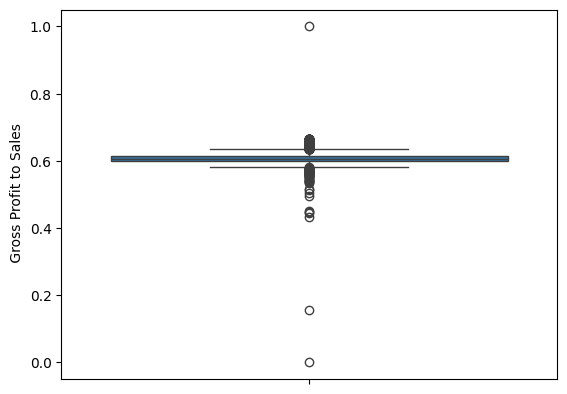

0       0.601453
1       0.610237
2       0.601449
3       0.583538
4       0.598782
          ...   
6814    0.604455
6815    0.598306
6816    0.610441
6817    0.607846
6818    0.627408
Name:  Gross Profit to Sales, Length: 6819, dtype: float64
0.013470375831841519
0.6341188347859092
0.5802373314585432
0       0.601453
1       0.610237
2       0.601449
3       0.583538
4       0.598782
          ...   
6814    0.604455
6815    0.598306
6816    0.610441
6817    0.607846
6818    0.627408
Name:  Gross Profit to Sales, Length: 6819, dtype: float64


In [4]:
# Dealong with outliers

#identify
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df[' Gross Profit to Sales']) # Added missing space in the column name
plt.show()

print(df[' Gross Profit to Sales']) # Added missing space in the column name
Q1 = df[' Gross Profit to Sales'].quantile(0.25) # Added missing space in the column name
Q3 = df[' Gross Profit to Sales'].quantile(0.75) # Added missing space in the column name

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df[' Gross Profit to Sales'] < lower].values # Added missing space in the column name
out2=df[df[' Gross Profit to Sales'] > upper].values # Added missing space in the column name

df[' Gross Profit to Sales'].replace(out1,lower,inplace=True) # Added missing space in the column name
df[' Gross Profit to Sales'].replace(out2,upper,inplace=True) # Added missing space in the column name

print(df[' Gross Profit to Sales']) # Added missing space in the column name

In [5]:
import pandas as pd

# Assuming 'df' is your DataFrame
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers for each column
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

# Option 1: Remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Option 2: Cap outliers (replace with upper/lower bounds)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)

Bankrupt?                                                    220
 ROA(C) before interest and depreciation before interest     391
 ROA(A) before interest and % after tax                      561
 ROA(B) before interest and depreciation after tax           432
 Operating Gross Margin                                      320
                                                            ... 
 Liability to Equity                                         404
 Degree of Financial Leverage (DFL)                         1503
 Interest Coverage Ratio (Interest expense to EBIT)         1421
 Net Income Flag                                               0
 Equity to Liability                                         549
Length: 96, dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
df[' Cash Flow to Equity']=pd.cut(df[' Cash Flow to Equity'],3,labels=['0','1','2'])
df[' No-credit Interval']=pd.cut(df[' No-credit Interval'],3,labels=['0','1','2'])
print(df)

X = df.drop('Bankrupt?', axis=1)
X = X.drop(' Net Income to Total Assets', axis=1)
Y = df[' Net Income to Total Assets']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

      Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                         

In [7]:
#  Convert categorical variables into numeric using one-hot encoding
df = pd.get_dummies(df, columns=[' Total assets to GNP price', ' Gross Profit to Sales'], drop_first=True)
# Verify the conversion
print(df.head())


   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [8]:
#Dealing with missing values
# Before applying SMOTE, impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') # Or another strategy like 'median'
X_imputed = imputer.fit_transform(X)

# Now use the imputed data for SMOTE
from imblearn.over_sampling import SMOTE
sms=SMOTE(random_state=0)
X_resampled, Y_resampled = sms.fit_resample(X_imputed,Y)

from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X_resampled, Y_resampled)
print(X_resampled,Y_resampled)

[[0.08282553 0.06928696 0.08838803 ... 0.5651584  1.         0.01990835]
 [0.         0.00692324 0.         ... 0.56515234 1.         0.01917054]
 [0.43879491 0.09016572 0.4645859  ... 0.56509806 1.         0.0087528 ]
 ...
 [0.97153025 1.         1.         ... 0.56519571 1.         0.051752  ]
 [0.57270999 0.98473615 0.59789068 ... 0.56516006 1.         0.14349636]
 [0.68795398 0.95453554 0.74168853 ... 0.56516403 1.         0.12603775]] [   0    1    2 ... 6816 6817 6818]


In [9]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
# Use the imputed data X_imputed instead of X
fit = bestfeatures.fit(X_imputed,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                                                Specs         Score
0    ROA(C) before interest and depreciation befor...  4.970305e+01
1              ROA(A) before interest and % after tax  5.255446e+01
2    ROA(B) before interest and depreciation after...  4.672594e+01
3                              Operating Gross Margin  3.215881e+00
4                         Realized Sales Gross Margin  3.209244e+00
..                                                ...           ...
89                                Liability to Equity  5.087017e+00
90                 Degree of Financial Leverage (DFL)  6.077141e+01
91   Interest Coverage Ratio (Interest expense to ...  2.105804e+00
92                                    Net Income Flag  8.405066e-29
93                                Equity to Liability  3.584477e+02

[94 rows x 2 columns]


In [10]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

# Assuming 'Bankrupt?' is the intended target variable for classification
X = df.drop('Bankrupt?', axis=1)
Y = df['Bankrupt?'] # Use 'Bankrupt?' as the target variable
print(Y)

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

# Train a Random Forest Classifier and a Gradient Boosting Classifier

#Initialize the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train, y_train) # Now y_train should be categorical
#Make predictions
y_pred = rf_classifier.predict(X_test)
# Verify predictions
print(y_pred)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy}\n')
print('Confusion Matrix:\n')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64
[[ 2.16533796e+09 -3.81862928e+07]
 [ 4.90246998e+08  8.46378123e+09]
 [-2.62017663e+09 -2.16994207e+09]
 ...
 [-2.62968578e+09 -2.70481936e+09]
 [-3.93149072e+09  1.16238718e+09]
 [-2.50668146e+09 -2.09828369e+09]]
0.39882697947214074
[0 0 0 ... 0 0 0]

Accuracy: 0.969208211143695

Confusion Matrix:

[[1983    4]
 [  59    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1987
           1       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



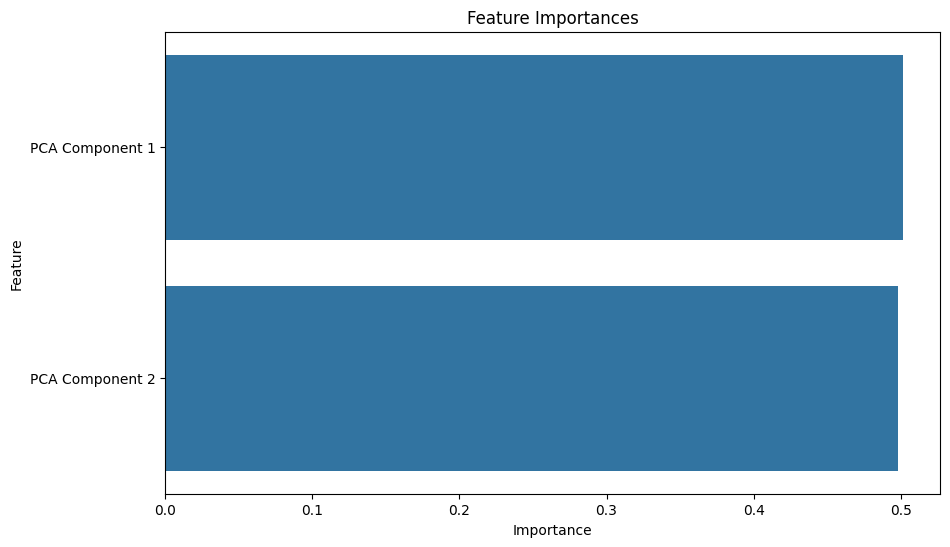

In [11]:
# Visualize feature importances
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_classifier.feature_importances_, index=['PCA Component 1', 'PCA Component 2'])

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


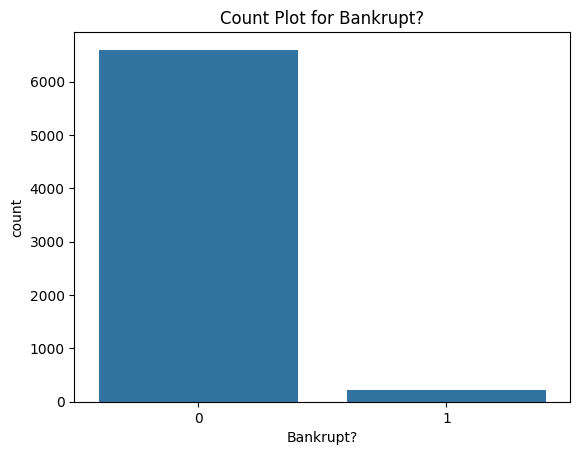

In [12]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Bankrupt?', data = df)
plt.title("Count Plot for Bankrupt?")
plt.show()

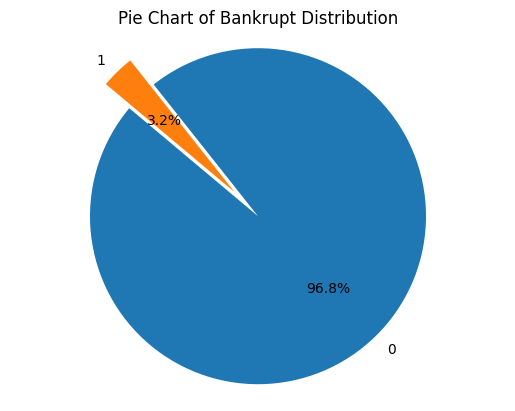

In [13]:
#Pie Chart to show the distribution of Bankrupt?
bankrupt_counts = df['Bankrupt?'].value_counts()
bankrupt_labels = bankrupt_counts.index
sizes = bankrupt_counts.values

plt.pie(sizes, labels=bankrupt_labels, autopct='%1.1f%%', startangle=140, explode=[0.1] * len(sizes))
plt.title("Pie Chart of Bankrupt Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()